In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns; sns.set()
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Bidirectional

from keras.utils.vis_utils import plot_model
from keras.utils.np_utils import to_categorical
from keras.utils import np_utils

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
number_of_samples = 2500000

In [4]:
data_attack = pd.read_csv('/content/drive/MyDrive/dataset_attack.csv', nrows = number_of_samples)

In [5]:
data_normal = pd.read_csv('/content/drive/MyDrive/dataset_normal.csv', nrows = number_of_samples)

In [6]:
data_normal.columns=[ 'frame.len', 'frame.protocols', 'ip.hdr_len',
       'ip.len', 'ip.flags.rb', 'ip.flags.df', 'p.flags.mf', 'ip.frag_offset',
       'ip.ttl', 'ip.proto', 'ip.src', 'ip.dst', 'tcp.srcport', 'tcp.dstport',
       'tcp.len', 'tcp.ack', 'tcp.flags.res', 'tcp.flags.ns', 'tcp.flags.cwr',
       'tcp.flags.ecn', 'tcp.flags.urg', 'tcp.flags.ack', 'tcp.flags.push',
       'tcp.flags.reset', 'tcp.flags.syn', 'tcp.flags.fin', 'tcp.window_size',
       'tcp.time_delta','class']
data_attack.columns=[ 'frame.len', 'frame.protocols', 'ip.hdr_len',
       'ip.len', 'ip.flags.rb', 'ip.flags.df', 'p.flags.mf', 'ip.frag_offset',
       'ip.ttl', 'ip.proto', 'ip.src', 'ip.dst', 'tcp.srcport', 'tcp.dstport',
       'tcp.len', 'tcp.ack', 'tcp.flags.res', 'tcp.flags.ns', 'tcp.flags.cwr',
       'tcp.flags.ecn', 'tcp.flags.urg', 'tcp.flags.ack', 'tcp.flags.push',
       'tcp.flags.reset', 'tcp.flags.syn', 'tcp.flags.fin', 'tcp.window_size',
       'tcp.time_delta','class']

In [7]:
data_normal=data_normal.drop(['ip.src', 'ip.dst','frame.protocols'],axis=1)
data_attack=data_attack.drop(['ip.src', 'ip.dst','frame.protocols'],axis=1)

In [8]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [9]:
features=[ 'frame.len', 'ip.hdr_len',
       'ip.len', 'ip.flags.rb', 'ip.flags.df', 'p.flags.mf', 'ip.frag_offset',
       'ip.ttl', 'ip.proto', 'tcp.srcport', 'tcp.dstport',
       'tcp.len', 'tcp.ack', 'tcp.flags.res', 'tcp.flags.ns', 'tcp.flags.cwr',
       'tcp.flags.ecn', 'tcp.flags.urg', 'tcp.flags.ack', 'tcp.flags.push',
       'tcp.flags.reset', 'tcp.flags.syn', 'tcp.flags.fin', 'tcp.window_size',
       'tcp.time_delta']

In [10]:
X_normal= data_normal[features].values
X_attack= data_attack[features].values
Y_normal= data_normal['class']
Y_attack= data_attack['class']
X=np.concatenate((X_normal,X_attack))
Y=np.concatenate((Y_normal,Y_attack))

In [11]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

x = min_max_scaler.fit_transform(X)


In [12]:
x.shape

(5000000, 25)

In [13]:
X=np.reshape(x, (250000, 500))

In [14]:
X.shape

(250000, 500)

In [15]:
for i in range(0,len(Y)):
  if Y[i]=="attack":
    Y[i]=1
  else:
    Y[i]=0

In [16]:
my_array = np.array(Y)

In [17]:
my_array.shape

(5000000,)

In [18]:
y_n=np.reshape(my_array, (250000,20))

In [19]:
y_n.shape

(250000, 20)

In [20]:
import numpy as np
l_n = y_n.tolist()

In [21]:
len(l_n)

250000

In [22]:
y_ll=[]
for i in range(0,len(l_n)):
  s=sum(l_n[i])
  if s>10:
    y_ll.append(1)
  else:
    y_ll.append(0)

In [23]:
y_all = np.array(y_ll)

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y_all, test_size = 0.20)

In [25]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(200000, 500)
(50000, 500)
(200000,)
(50000,)


In [26]:
X_train=np.reshape(X_train, (200000, 25,20))
X_test =np.reshape(X_test, (50000, 25,20))
Y_train=np.reshape(Y_train, (200000,1))
Y_test =np.reshape(Y_test, (50000,1))

In [27]:
def create_baseline():
    model = Sequential()
    model.add(LSTM(8, activation='relu', return_sequences=True, input_shape=(25, 20)))
    model.add(LSTM(8, activation='relu'))
    
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse', metrics = ['accuracy'])
    
    return model

In [28]:
model = create_baseline()

In [29]:
history=model.fit(X_train, Y_train, epochs=100,validation_data=(X_test, Y_test))

Epoch 1/100
6250/6250 [==============================] - 99s 15ms/step - loss: 0.0815 - accuracy: 0.8924 - val_loss: 0.0611 - val_accuracy: 0.9219
Epoch 2/100
6250/6250 [==============================] - 97s 16ms/step - loss: 0.0558 - accuracy: 0.9292 - val_loss: 0.0494 - val_accuracy: 0.9357
Epoch 3/100
6250/6250 [==============================] - 96s 15ms/step - loss: 0.0483 - accuracy: 0.9393 - val_loss: 0.0510 - val_accuracy: 0.9386
Epoch 4/100
6250/6250 [==============================] - 101s 16ms/step - loss: 0.0425 - accuracy: 0.9478 - val_loss: 0.0431 - val_accuracy: 0.9451
Epoch 5/100
6250/6250 [==============================] - 98s 16ms/step - loss: 0.0373 - accuracy: 0.9541 - val_loss: 0.0354 - val_accuracy: 0.9566
Epoch 6/100
6250/6250 [==============================] - 101s 16ms/step - loss: 0.0346 - accuracy: 0.9577 - val_loss: 0.0354 - val_accuracy: 0.9571
Epoch 7/100
6250/6250 [==============================] - 97s 16ms/step - loss: 0.0326 - accuracy: 0.9608 - val_loss:

In [30]:
test_loss,test_accuracy=model.evaluate(X_test,Y_test)

1563/1563 [==============================] - 13s 8ms/step - loss: 0.0170 - accuracy: 0.9792


In [31]:
model.save('/content/drive/MyDrive/dataset_attack/module5.tl')


INFO:tensorflow:Assets written to: /content/drive/MyDrive/dataset_attack/module5.tl/assets


In [32]:
predict = model.predict(X_test, verbose=1)

1563/1563 [==============================] - 10s 6ms/step


In [34]:
tp = 0
tn = 0
fp = 0
fn = 0
predictn = predict.flatten().round()
predictn = predictn.tolist()
Y_testn = Y_test.tolist()
for i in range(len(Y_testn)):
  if int(predictn[i])==1 and int(Y_testn[i][0])==1:
    tp+=1
  elif int(predictn[i])==0 and int(Y_testn[i][0])==0:
    tn+=1
  elif int(predictn[i])==0 and int(Y_testn[i][0])==1:
    fp+=1
  elif int(predictn[i])==1 and int(Y_testn[i][0])==0:
    fn+=1

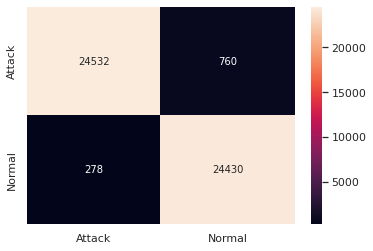

In [35]:
to_heat_map =[[tn,fp],[fn,tp]]
to_heat_map = pd.DataFrame(to_heat_map, index = ["Attack","Normal"],columns = ["Attack","Normal"])
ax = sns.heatmap(to_heat_map,annot=True, fmt="d")

In [36]:
scores = model.evaluate(X_test, Y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 97.92%


In [37]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


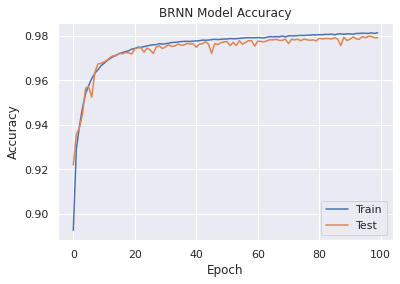

In [38]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('BRNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.savefig('BRNN Model Accuracy.png')
plt.show()

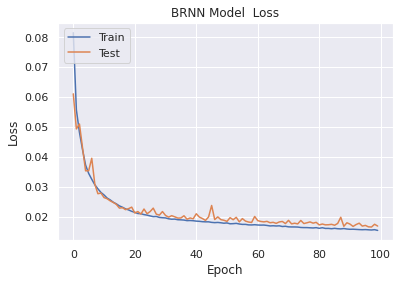

In [39]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('BRNN Model  Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('BRNN Model Loss.png')
plt.show()